In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [2]:
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Preparation

In [3]:
# instantiate list of binary variables
var_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes':1,'no':0})

# applying the function to the housing data
housing[var_list] = housing[var_list].apply(binary_map)

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


# Dummy Variable

In [5]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [6]:
housing = pd.concat([housing,status],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [7]:
housing.drop('furnishingstatus', axis=1, inplace=True)

In [8]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Splitting data into Train and Test

In [9]:
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)

In [10]:
# instantiate the object
scaler = MinMaxScaler()

# instantiate num_vars
num_vars = ['price','area','bedrooms','bathrooms','stories','parking']

# fit_transform
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


# Dividing into X and y sets for the model building

In [11]:
y_train = df_train.pop('price')
X_train = df_train

# Building our model
- using RFE ( $Recursive Feature Elimination$ )

In [13]:
# Running RFE with the oupput number of the variable equal to 10
# Instantiate the model 
lm = LinearRegression()

# fit the model
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, 10)

# fit RFE
rfe = rfe.fit(X_train, y_train)

In [19]:
# check the list of columns that select as top 10 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [20]:
# take those columns which rfe supports
col = X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [21]:
# columns that RFE not support
X_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

# Building model using Statsmodel, for the detailed statistics

In [22]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [25]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [26]:
# Instantiate model and fit the model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [27]:
# see the summary 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.28e-82
Time:                        11:57:52   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018     

### Bedrooms is insignifcant in presence of other variables

In [28]:
X_train_new  = X_train_rfe.drop('bedrooms', axis=1)

In [29]:
X_train_sm = sm.add_constant(X_train_new)

In [30]:
lm = sm.OLS(y_train, X_train_sm).fit()

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           6.67e-83
Time:                        13:18:47   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

In [33]:
X_train_new.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [34]:
X_train_new = X_train_new.drop('const', axis=1)

In [40]:
# calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


# Residual Analysis

In [54]:
y_train_pred = lm.predict(X_train_sm)
res = y_train - y_train_pred

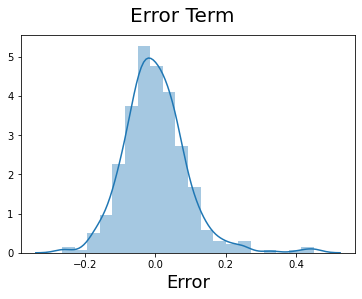

In [55]:
fig= plt.figure()
sns.distplot(res, bins= 20)
fig.suptitle('Error Term', fontsize= 20)
plt.xlabel('Error', fontsize= 18)
plt.show()

# Making Predictions

In [57]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [60]:
# Scaling the numeric variables of the test set
num_vars = ['price','area','bedrooms','bathrooms','stories','parking']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
df_test[num_vars].head()

,price,area,bedrooms,bathrooms,stories,parking
265,0.229697,0.091869,0.4,0.0,0.333333,0.000000
54,0.484848,0.366420,0.4,0.5,0.333333,0.333333
171,0.303030,0.742080,0.4,0.0,0.000000,0.333333
244,0.242424,0.306582,0.4,0.0,0.333333,0.000000
268,0.227879,0.274023,0.6,0.0,0.333333,0.000000


In [62]:
# divide into X and y
y_test = df_test.pop('price')
X_test = df_test

In [64]:
X_test.shape

(164, 13)

In [67]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [70]:
y_pred = lm.predict(X_test_new)

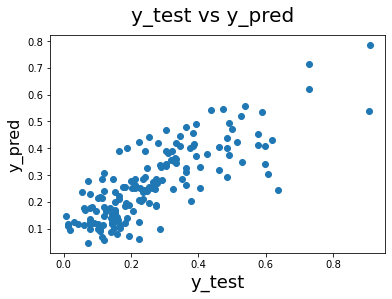

In [72]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize= 20)
plt.xlabel('y_test', fontsize= 18)
plt.ylabel('y_pred', fontsize= 16)
plt.show()

In [77]:
# cheking the r-square 
r2_score(y_true=y_test, y_pred=y_pred)

0.6481740917926483

#### R-squared value comes out to be same so we can rely on that model